### Загружаем датасет

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('dataset.csv')
df.rename(columns={df.columns[0]: 'id'}, inplace=True) # первый столбец - id
pd.set_option('display.max_columns', None) # отображение всех колонок
target = "popularity"
print(f"Размер датасета: {df.shape}")

Размер датасета: (114000, 21)


### Смотрим на структуру датасета

In [2]:
df.head()

,id,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Смотрим информацию о данных + проверка дубликатов

In [3]:
print(df.info())
print(f"Количество полных дубликатов: {df.duplicated().sum()}")
print(f"Дубликаты по track_id: {df['track_id'].duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
df[df['artists'].isnull()]

,id,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


### Анализируем целевую переменную - популярность

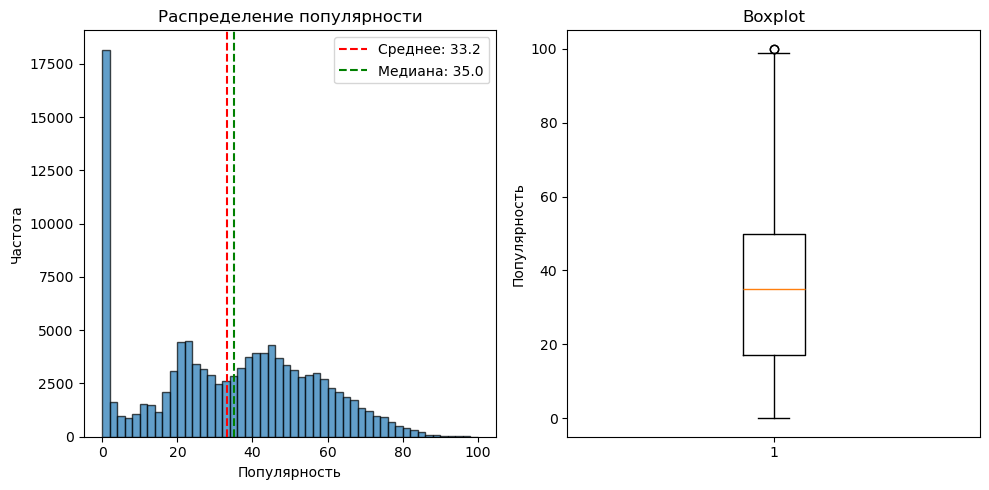

СТАТИСТИКА
count    114000.000000
mean         33.238535
std          22.305078
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# распределение популярности
axes[0].hist(df['popularity'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Популярность')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение популярности')
axes[0].axvline(df['popularity'].mean(), color='red', linestyle='--', label=f'Среднее: {df["popularity"].mean():.1f}')
axes[0].axvline(df['popularity'].median(), color='green', linestyle='--', label=f'Медиана: {df["popularity"].median():.1f}')
axes[0].legend()

# boxplot
axes[1].boxplot(df['popularity'])
axes[1].set_title('Boxplot')
axes[1].set_ylabel('Популярность')

plt.tight_layout()
plt.show()

print("СТАТИСТИКА")
print(df['popularity'].describe())

### Матрица корреляций

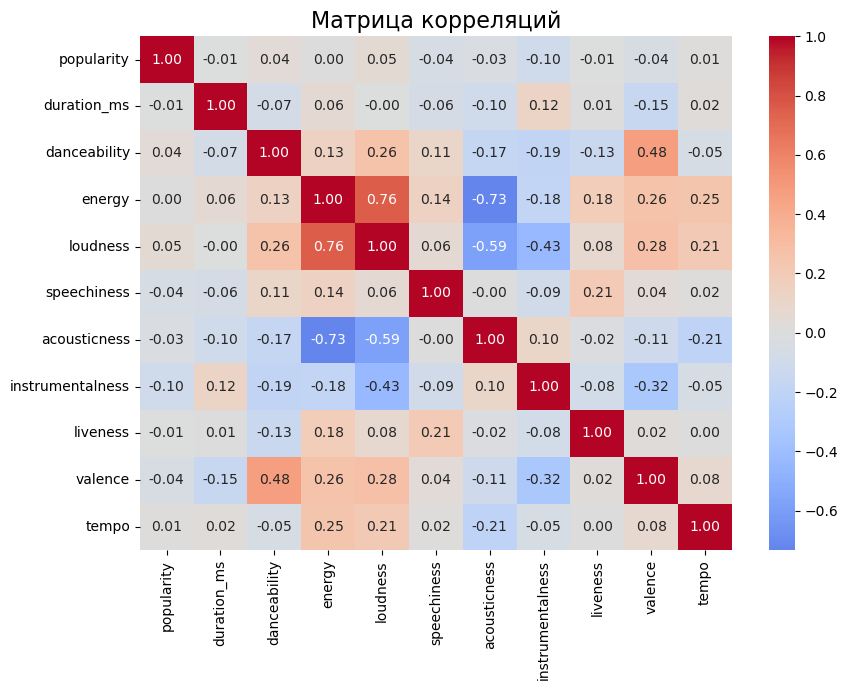

In [6]:
numeric_cols = ['duration_ms', 'danceability', 'energy', 'loudness', 
                'speechiness', 'acousticness', 'instrumentalness', 
                'liveness', 'valence', 'tempo']
corr_cols = ['popularity'] + numeric_cols
correlation_matrix = df[corr_cols].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Матрица корреляций', fontsize=16)
plt.tight_layout()
plt.show()

### Анализ категориальных признаков

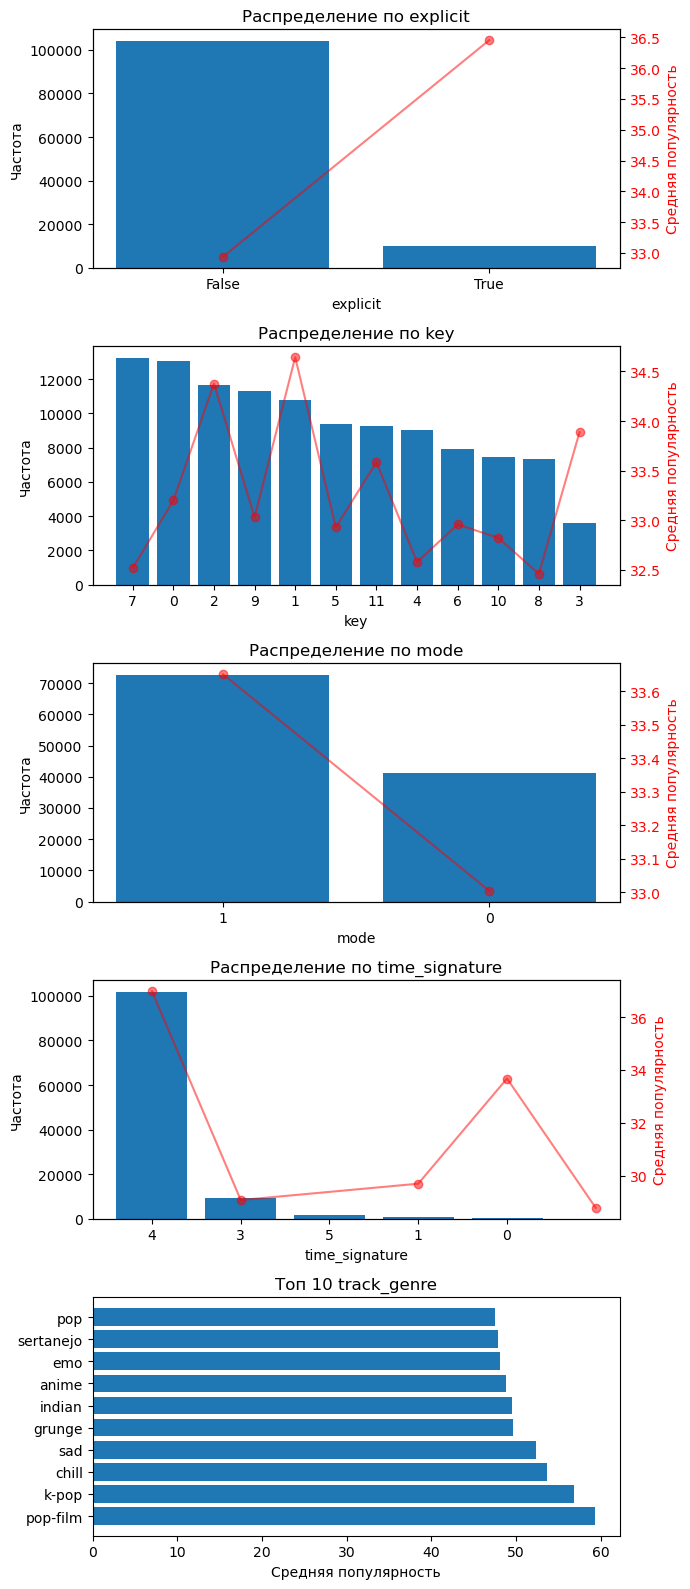

In [7]:
cat = ['explicit', 'key', 'mode', 'time_signature', 'track_genre']

fig, axes = plt.subplots(5, 1, figsize=(7, 16))
axes = axes.flatten()

for idx, col in enumerate(cat):
    if col == 'track_genre':
        genre_stats = df.groupby(col)['popularity'].agg(['mean']).sort_values('mean', ascending=False)
        top_data = genre_stats.head(10)
        values = top_data['mean']
        labels = top_data.index
        axes[idx].barh(labels, values)
        axes[idx].set_title(f"Топ 10 {col}")
        axes[idx].set_xlabel('Средняя популярность')
    else:
        value_counts = df[col].value_counts()
        axes[idx].bar(value_counts.index.astype(str), value_counts.values)
        axes[idx].set_title(f'Распределение по {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Частота')

        # вторая ось - для среднего значения target по группам
        ax2 = axes[idx].twinx()
        category_popularity = df.groupby(col)['popularity'].mean()
        ax2.plot(category_popularity, 'ro-', alpha=0.5, label='Средняя популярность')
        ax2.set_ylabel('Средняя популярность', color='red')
        ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

In [8]:
genres = df.groupby('track_genre')['popularity'].agg(['count'])
print(f"Уникальных значений количества: {genres['count'].nunique()}")
genres

Уникальных значений количества: 1


,count
track_genre,
acoustic,1000
afrobeat,1000
alt-rock,1000
alternative,1000
ambient,1000
...,...
techno,1000
trance,1000
trip-hop,1000


### Анализ числовых признаков

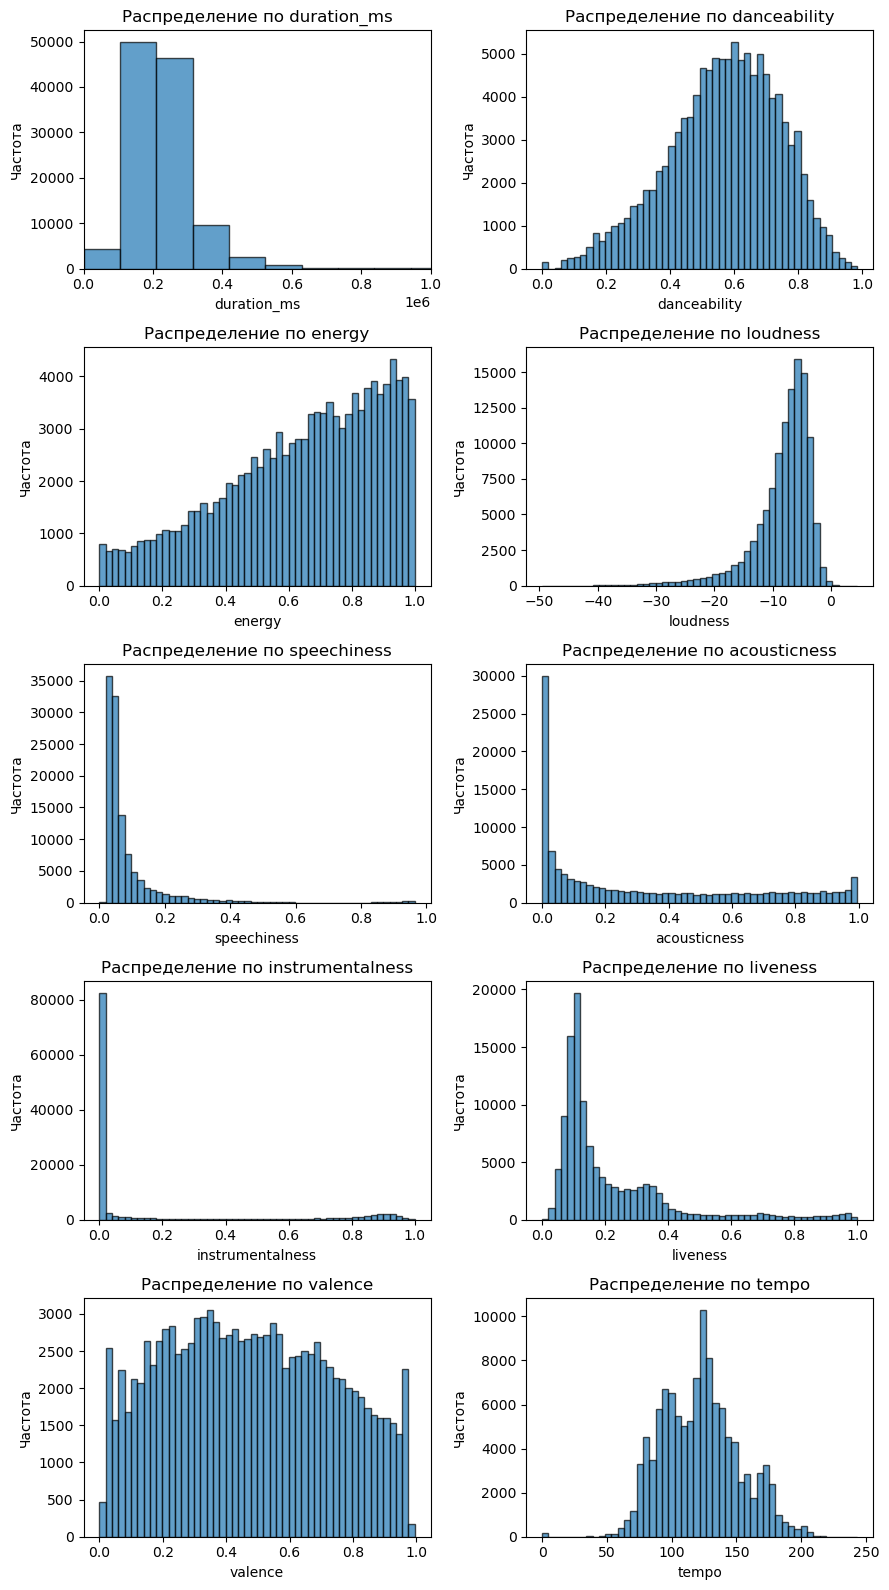

In [9]:
num = ['duration_ms', 'danceability', 'energy', 'loudness', 
       'speechiness', 'acousticness', 'instrumentalness', 
       'liveness', 'valence', 'tempo']

fig, axes = plt.subplots(5, 2, figsize=(9, 16))
axes = axes.flatten()

for idx, col in enumerate(num):
    value_counts = df[col].value_counts()
    axes[idx].hist(df[col], bins=50, alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'Распределение по {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Частота')
    if col == 'duration_ms':
        axes[idx].set_xlim(0, 1*10**6)

plt.tight_layout()
plt.show()

### Просмотр названий жанров

In [10]:
genres_series = df.groupby('track_genre')['track_genre']
for name in genres_series.unique():
    print(name)

['acoustic']
['afrobeat']
['alt-rock']
['alternative']
['ambient']
['anime']
['black-metal']
['bluegrass']
['blues']
['brazil']
['breakbeat']
['british']
['cantopop']
['chicago-house']
['children']
['chill']
['classical']
['club']
['comedy']
['country']
['dance']
['dancehall']
['death-metal']
['deep-house']
['detroit-techno']
['disco']
['disney']
['drum-and-bass']
['dub']
['dubstep']
['edm']
['electro']
['electronic']
['emo']
['folk']
['forro']
['french']
['funk']
['garage']
['german']
['gospel']
['goth']
['grindcore']
['groove']
['grunge']
['guitar']
['happy']
['hard-rock']
['hardcore']
['hardstyle']
['heavy-metal']
['hip-hop']
['honky-tonk']
['house']
['idm']
['indian']
['indie']
['indie-pop']
['industrial']
['iranian']
['j-dance']
['j-idol']
['j-pop']
['j-rock']
['jazz']
['k-pop']
['kids']
['latin']
['latino']
['malay']
['mandopop']
['metal']
['metalcore']
['minimal-techno']
['mpb']
['new-age']
['opera']
['pagode']
['party']
['piano']
['pop']
['pop-film']
['power-pop']
['progressive

count    113999.000000
mean          1.388538
std           0.863545
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          38.000000
Name: artist_count, dtype: float64


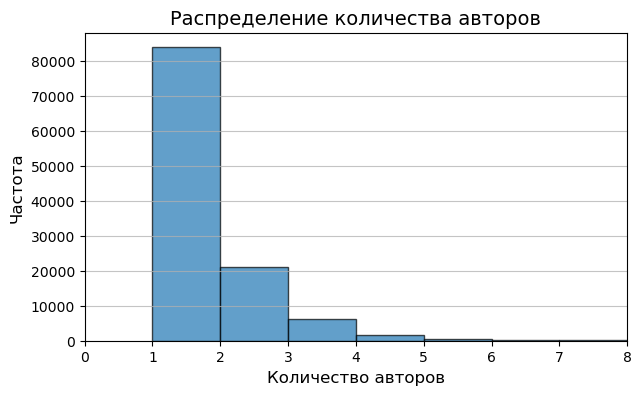

In [24]:
df['artist_count'] = df['artists'].str.split(';').str.len()
print(df['artist_count'].describe())
# Настройка стиля
plt.figure(figsize=(7, 4))
plt.hist(df['artist_count'], bins=37, edgecolor='black', alpha=0.7)
plt.xlabel('Количество авторов', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.xlim(0, 8)
plt.title('Распределение количества авторов', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Выводы
### Полученные результаты
- Размер датасета: (114000, 21).
- Есть только 1 строка с пропусками в 3-х колонках.
- Целевая переменная - популярность - имеет пик в нуле, затем 2 локальных максимума на отметках 22-24, 45 со средним 33.2, медианой 35. Сам показатель от 0 до 100. Легкий левый сдвиг, длинный правый хвост.
- С популярностью почти не связаны никакие числовые признаки по матрице корреляции(!). Самая сильная отрицательная связь -0.10 с признаком instrumentalness. Самая сильная положительная связь 0.05 с loudness. Популярность зависит от сложных комбинаций и неаудио факторов.
- Песни с explicit = 1 чуть популярнее, чем с explicit = 0.
- Есть популярные (1, 2, 3) и непопулярные (4, 7, 8) тональности.
- Лад (mode) почти никак не влияет на значение популярности.
- Самый популярный и часто используемый такт (time_signature): 4.
- Самые популярные жанры: pop-film, k-pop, chill, sad, grunge. Каждого жанра в датасете по 1000 строк, всего жанров 114, отсюда и количество строк: 114000.
- Длительность песен в основном от 3.3 до 5 минут.
- danceability (от 0 до 1) распределен нормально со средним около 0.6 и левым хвостом.
- Энергия (от 0 до 1) распределена плавно восходяще: песен становится линейно больше с ростом энергии.
- Среднее значение loudness: -6. Левый хвост. Очень мало значений, больше нуля.
- Распределения speechness, acousticness, instrumentalness, liveness похожи. Наблюдается пик в нуле и экспоненциальное падение сразу после нуля до 1.
- Авторов преимущественно 1, встречаются песни и с двумя и более авторами
Главный вывод: ни один признак не имеет сильной связи с популярностью (target). Значит нужно улавливать сложные и нелинейные связи. Нужны сочетания признаков и их контекст.

### Идеи для feature engineering
1. Превращение длительности музыки из мс в минуты
2. Взаимодействия признаков для создания более общих признаков: громкая + танцевальная музыка, спокойная + тихая и др.
3. Группировка жанров: поп-музыка, радикальная, фоновая и др.
4. Нелинейные преобразования отдельных признаков
5. Создание признаков для нахождения песен категорий "вирусная", "радио" и др.